# What is the most optimal skill to learn as a Data Analyst?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [52]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].dropna(subset='salary_year_avg').copy()

In [54]:
df_us = df_us.dropna(subset=['salary_year_avg'])

In [55]:
df_us_exploded = df_us.explode('job_skills')
df_us_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"


In [56]:
df_us_skills = df_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count',ascending=False)

df_us_skills = df_us_skills.rename(columns={'count':'job_count', 'median':'median_salary'})

df_len = len(df_us)

df_us_skills['percent'] = df_us_skills['job_count'] / df_len * 100.0

df_us_skills = df_us_skills[df_us_skills['percent']>5]

df_us_skills

,job_count,median_salary,percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [69]:
df['job_type_skills'].iloc[1]

"{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}"

In [73]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

In [75]:
technology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value


for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

In [85]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ssrs
0,analyst_tools,qlik
0,analyst_tools,sharepoint
0,analyst_tools,powerpoint
0,analyst_tools,excel
...,...,...
9,sync,wire
9,sync,rocketchat
9,sync,symphony
9,sync,microsoft teams


In [90]:
df_plot = df_us_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,job_count,median_salary,percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


4 [-0.16898336  0.80028509]
5 [-0.07141798  0.63252907]


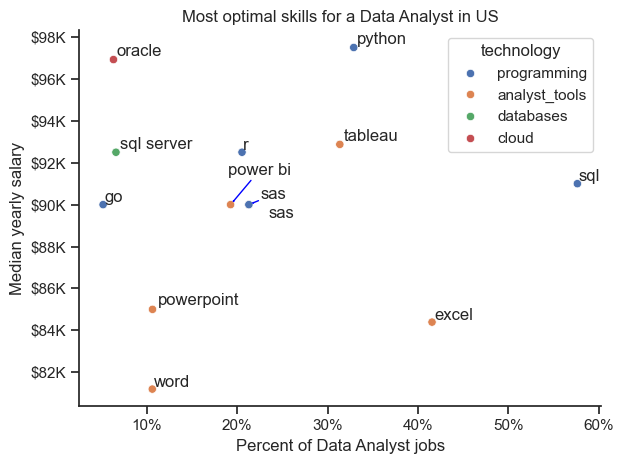

In [96]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_plot,
    x='percent',
    y='median_salary',
    hue='technology'
)
sns.set_theme(style='ticks')
sns.despine()
plt.title('Most optimal skills for a Data Analyst in US')
plt.xlabel('Percent of Data Analyst jobs')
plt.ylabel('Median yearly salary')

texts =[]
for i, txt in enumerate(df_plot['skills']):
    texts.append(plt.text(df_plot['percent'].iloc[i],df_plot['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='blue'))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()